# <font color=green>Table of Contentes:</font>

[ <font color=blue>1. What is Stationarity</font>](#1)   
[ <font color=blue>2. Why is it importent Time Series Analysis</font>](#2)    
[ <font color=blue>3. Criteria of being Stationary</font>](#3)     
[ <font color=blue>4. Difference between Stationarity and White Noise</font>](#4)     
[ <font color=blue>5. How to test Stationarity</font>](#5)     
[<font color=blue>6. Dickey-Fuller Test (Example)</font>](#6)          
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[<font color=blue>6.1. Load the dataset along with necessary modules</font>](#8)       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[<font color=blue>6.2. Data Preprocessing</font>](#9)       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[<font color=blue>6.3. Plotting for Visualization</font>](#10)       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[<font color=blue>6.4. Function of Dickey-Fuller Test</font>](#11)       
[<font color=blue>7. Converting the Non-Stationary series into a Stationary one</font>](#12)     
[<font color=blue>8. Again applying Dickey-Fuller Test</font>](#13)     

<br/>
<br/>

<a id =1></a>

## <font color=red>1. What is Stationarity</font>

Stationarity indicates a time series whose statistical properties such as **Mean**, **Variance (Standard Deviation / Volatility)**, **Autocorrelation**, etc. are all constant over time.
<br/>

Let's take a look how a stationary time series looks like and also compare it with a non-stationary time series.

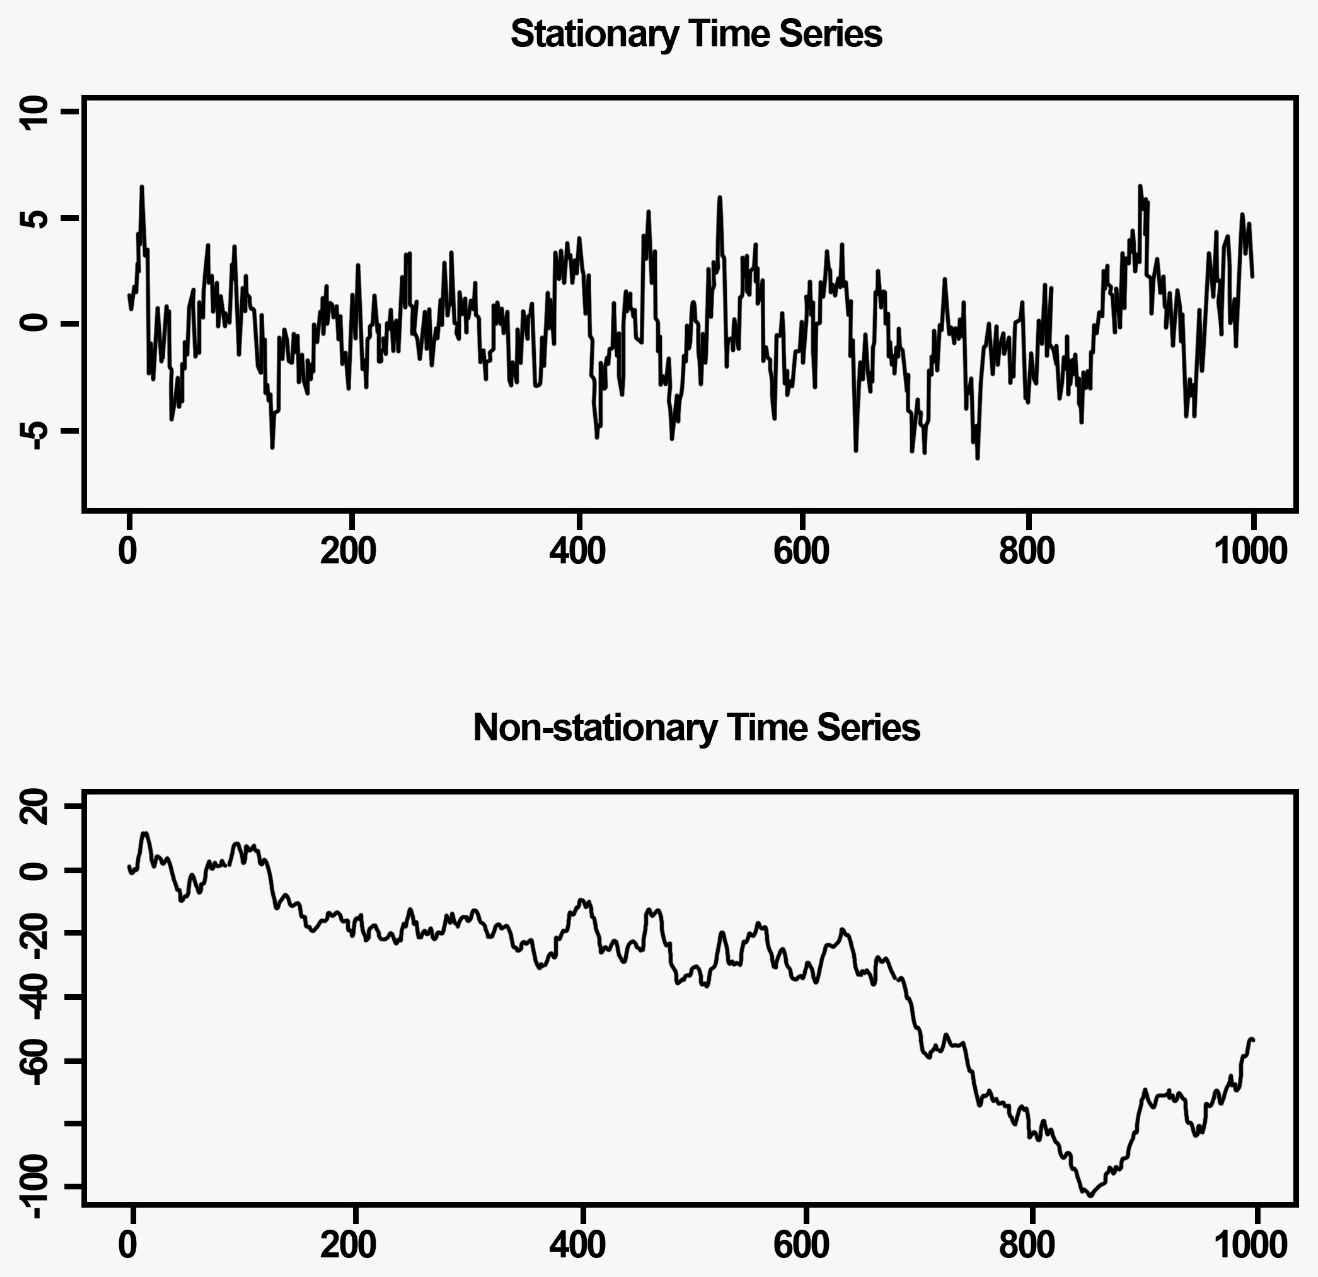

<a id =2></a>
<br/>

## <font color=red>2. Why is it important in Time Series Analysis</font>

A stationary time series is relatively easy to predict. And for some models, it is a must to use stationary dataset. But if the dataset isn't stationary, we can use the models after making them stationary. 

<a id =3> </a>

## <font color=red>3. Criteria of being Stationary</font>

1. Mean of the time series is constant.
2. Standard deviation / volatility is also constant.
3. There's no seasonality (Seasonality basically means the behaviour which changes over time or not having a periodic pattern).
4. There won't be any trend.

<a id =4> </a>
## <font color=red>4. Difference between Stationarity and White Noise</font>

Sometimes we get easily confused with **Stationarity** and **White Noise**. But all we have to remember is all stationary data can be white noise, but all the white noise can't be stationary. The criteria of White noise is as same as Stationarity except the mean. The mean of the White noise data must have to be **0**.

<a id =5> </a>
## <font color = red>5. How  to test Stationarity</font>

1. Visually
2. Global vs Local Test
3. Augmented Dickey-Fuller Test (ADF Test)

<a id =6> </a>
<br/>

## <font color = red>6. Dickey Fuller Test (Example)</font>

<a id =8> </a>
<br/>

#### 6.1. Load the dataset along with necessary modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../input/perrin-freres-monthly-champagne-sales/Perrin Freres monthly champagne sales millions.csv')

df.head()

<a id =9> </a>
<br/>

#### 6.2. Data Preprocessing

In [ ]:
df.drop([105,106], axis = 0, inplace = True)

In [ ]:
df.columns = ['Month', 'Sales']
df.head()

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.set_index('Month', inplace = True)
df.head()

<a id =10> </a>
<br/>

#### 6.3. Plotting for Visualization

In [ ]:
plt.figure(figsize = (12, 5))

plt.plot(df['Sales'])
plt.show()

**Note:**  
From the **visual testing**, we are seeing that there's a seasonality in the series. As visual test isn't that strong evidence, now we will go for **Augmented Dickey-Fuller Test** to check whether the series is stationary or not.

<a id =11> </a>
<br/>

#### 6.4. Function of Dickey-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(df['Sales'])

**Note:**  
As the **P-Value** is greater than **0.05**, The series is **Non-Stationary**.

<a id =12> </a>
<br/>

## <font color=red>7. Convert the Non-Stationary series into a Stationary one</font>

**Differencing** is the process to do this job.  
As the data is seasional and each year consists 12 month, from the graph we are seeing that the per cycle difference of the data is 12 months. That's why we will shift 12 here and the substraction from the **Sales** column will be stored in a new column titled **seasonal_first_difference**.

In [ ]:
df['seasional_first_difference'] = df['Sales'] - df['Sales'].shift(12)
df

In [ ]:
plt.figure(figsize = (12, 5))

plt.plot(df['seasional_first_difference'])
plt.show()

<a id =13> </a>
<br/>

## <font color=red>8. Again applying Dickey-Fuller Test</font>

In [ ]:
adfuller_test(df['seasional_first_difference'].dropna())

**Note:**  
As the P-Value is now less than 0.05, we can easily say that the data or series is **Stationary**.

<br/>
<br/>

**Image sources:** oreilly.com